# Домашняя работа по методам оптимизации, 
# Вариант 2, методы: Дихотомия - 2, Фибоначчи, Пиявского
## Выполнил: Кумин Алексей, гр. 381603-3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
func = lambda x: (x**2 - 5.0 * x + 6.0) / (x**2 + 1)

# Дихотомия-2

In [3]:
def dihotomy2(a_0, b_0, ee, Q, ax, tab):
    a = a_0
    b = b_0
    c = (a + b) / 2.0
    it = 0
    
    tab=tab.append(
        {'iteration': it, 'a': a, 'Q(a)':Q(a), 'c': c, 'Q(c)': Q(c) ,'b':b, 'Q(b)': Q(b)}, 
        ignore_index=True)
    
    ax.scatter(c, Q(c), marker = "+", c = "green")
    ax.scatter(c, 0.0, marker = "+", c = "blue")
    
    while (b - a > ee):
        x = (a + c) / 2.0
        y = (c + b) / 2.0
        it += 1
        
        tab=tab.append(
            {'iteration': it, 'a': a, 'Q(a)':Q(a), 'c': x, 'Q(c)': Q(x) ,'b':c, 'Q(b)': Q(c)}, 
            ignore_index=True)
        tab=tab.append(
            {'iteration': it, 'a': c, 'Q(a)':Q(c), 'c': y, 'Q(c)': Q(y) ,'b':b, 'Q(b)': Q(b)}, 
            ignore_index=True)
        
        ax.scatter(x, Q(x), marker = "+", c = "green")
        ax.scatter(x, 0.0, marker = "+", c = "blue")
        ax.scatter(y, Q(y), marker = "+", c = "green")
        ax.scatter(y, 0.0, marker = "+", c = "blue")
        
        if (Q(x) <= Q(c)) and (Q(c)  < Q(y)):
            b = c
            c = x
        elif (Q(x) > Q(c)) and (Q(c) <= Q(y)):
            a = x
            b = y
        else:
            a = c
            c = y
    
    minimum = (a + b) / 2.0
    tab=tab.append(
        {'iteration': it, 'a': a, 'Q(a)':Q(a), 'c': x, 'Q(c)': Q(x) ,'b':c, 'Q(b)': Q(c)}, 
        ignore_index=True)
    tab=tab.append(
        {'iteration': it, 'a': c, 'Q(a)':Q(c), 'c': y, 'Q(c)': Q(y) ,'b':b, 'Q(b)': Q(b)}, 
        ignore_index=True)
    return [minimum, Q(minimum)], tab

[2.414215087890625, -0.0355339059323847]


,iteration,a,Q(a),c,Q(c),b,Q(b)
0,0.0,2.000000,0.000000,4.000000,0.117647,6.000000,0.324324
1,1.0,2.000000,0.000000,3.000000,0.000000,4.000000,0.117647
2,1.0,4.000000,0.117647,5.000000,0.230769,6.000000,0.324324
3,2.0,2.000000,0.000000,2.500000,-0.034483,3.000000,0.000000
4,2.0,3.000000,0.000000,3.500000,0.056604,4.000000,0.117647
5,3.0,2.000000,0.000000,2.250000,-0.030928,2.500000,-0.034483
6,3.0,2.500000,-0.034483,2.750000,-0.021898,3.000000,0.000000
7,4.0,2.250000,-0.030928,2.375000,-0.035294,2.500000,-0.034483
8,4.0,2.500000,-0.034483,2.625000,-0.029703,2.750000,-0.021898
9,5.0,2.250000,-0.030928,2.312500,-0.033846,2.375000,-0.035294


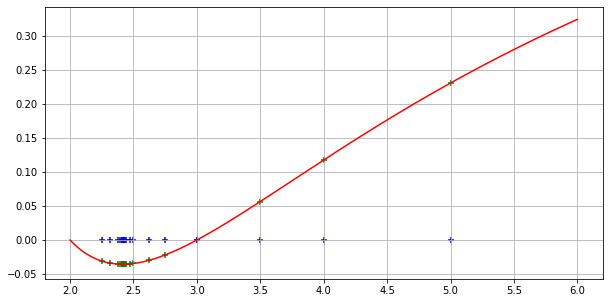

In [11]:
fig, ax1 = plt.subplots(nrows = 1, figsize = (10, 5))
tab = pd.DataFrame(columns=['iteration', 'a', 'Q(a)', 'c', 'Q(c)' ,'b', 'Q(b)'])
minimum, tab = dihotomy2(2, 6, 0.00001, func, ax1, tab)
print(minimum)
xx = np.linspace(2, 6, 1000)
ax1.plot(xx, func(xx), c = "red")
ax1.grid()
tab

# Фибоначчи

In [5]:
def n_opt_fib(a_0, b_0, ee, d):
    F0 = 1
    F1 = 1
    n = 1
    while ((b_0 - a_0) / F1 + ee > d):
        Ftmp = F0 + F1
        F0 = F1
        F1 = Ftmp
        n += 1
    return [F1, F0, n]

def fib(a_0, b_0, ee, d, Q, ax, tab):
    a = a_0
    b = b_0
    
    tmp = n_opt_fib(a, b, ee, d)
    n = tmp[2]
    lamda2 = tmp[1] / tmp[0]
    y = a + lamda2 * (b - a)
    x = b - lamda2 * (b - a)
    k = 2
    tab=tab.append(
        {'k': k, 'a': a, 'Q(a)':Q(a), 'x': x, 'Q(x)': Q(x) ,'y':y, 'Q(y)': Q(y), 'b':b, 'Q(b)': Q(b)}, 
        ignore_index=True)
    
    plt.scatter(x, Q(x), marker = "+", c = "green")
    plt.scatter(x, 0.0, marker = "+", c = "blue")
    plt.scatter(y, Q(y), marker = "+", c = "green")
    plt.scatter(y, 0.0, marker = "+", c = "blue")
    
    while (k < n):
        if (Q(x) < Q(y)):
            b = y
            y = x
            x = a + (b - y)
            
            plt.scatter(x, Q(x), marker = "+", c = "green")
            plt.scatter(x, 0.0, marker = "+", c = "blue")
        else:
            a = x
            x = y
            y = b - (x - a)
            
            plt.scatter(x, Q(x), marker = "+", c = "green")
            plt.scatter(x, 0.0, marker = "+", c = "blue")
        k += 1
        tab=tab.append(
            {'k': k, 'a': a, 'Q(a)':Q(a), 'x': x, 'Q(x)': Q(x) ,'y':y, 'Q(y)': Q(y), 'b':b, 'Q(b)': Q(b)}, 
            ignore_index=True)
        
    xopt = (b + a) / 2.0 + ee
    
    plt.scatter(xopt, Q(xopt), marker = "+", c = "red")
    plt.scatter(xopt, 0.0, marker = "+", c = "red")
    return [xopt, Q(xopt)], tab

[2.4142124450708735, -0.03553390593254833]


,k,a,Q(a),x,Q(x),y,Q(y),b,Q(b)
0,2.0,2.000000,0.000000,3.527864,0.059982,4.472136,0.173301,6.000000,0.324324
1,3.0,2.000000,0.000000,2.944272,-0.005443,3.527864,0.059982,4.472136,0.173301
2,4.0,2.000000,0.000000,2.583592,-0.031663,2.944272,-0.005443,3.527864,0.059982
3,5.0,2.000000,0.000000,2.360680,-0.035082,2.583592,-0.031663,2.944272,-0.005443
4,6.0,2.000000,0.000000,2.222912,-0.029155,2.360680,-0.035082,2.583592,-0.031663
5,7.0,2.222912,-0.029155,2.360680,-0.035082,2.445825,-0.035386,2.583592,-0.031663
6,8.0,2.360680,-0.035082,2.445825,-0.035386,2.498447,-0.034519,2.583592,-0.031663
7,9.0,2.360680,-0.035082,2.413302,-0.035534,2.445825,-0.035386,2.498447,-0.034519
8,10.0,2.360680,-0.035082,2.393202,-0.035466,2.413302,-0.035534,2.445825,-0.035386
9,11.0,2.393202,-0.035466,2.413302,-0.035534,2.425725,-0.035514,2.445825,-0.035386


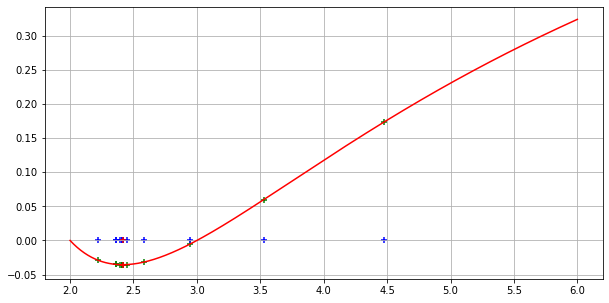

In [8]:
fig, ax1 = plt.subplots(nrows = 1, figsize = (10, 5))
tab = pd.DataFrame(columns=['k','a','Q(a)','x','Q(x)','y','Q(y)', 'b','Q(b)'])
minimum, tab = fib(2, 6, 0.0000001, 0.00001, func, ax1, tab)
print(minimum)
xx = np.linspace(2, 6, 1000)
ax1.plot(xx, func(xx), c = "red")
ax1.grid()
tab

# Пиявский

In [25]:
def computeL(x_Q_pairs, r):
    L = [];
    for i in range(0, len(x_Q_pairs) - 1):
        L.append(np.abs(x_Q_pairs[i + 1][1] - x_Q_pairs[i][1]) / (x_Q_pairs[i + 1][0] - x_Q_pairs[i][0]))
    Lmax = max(L)
    if Lmax > 0:
        return r * Lmax
    else:
        return 1

def find_minR(x_Q_pairs, r):
    L = computeL(x_Q_pairs, r)
    x_R = []
    for i in range(0, len(x_Q_pairs) - 1):
        tmp = ((x_Q_pairs[i + 1][0] + x_Q_pairs[i][0])/2 - (x_Q_pairs[i + 1][1] - x_Q_pairs[i][1]) / (2 * L),
               (x_Q_pairs[i + 1][1] + x_Q_pairs[i][1]) / 2 - L*((x_Q_pairs[i + 1][0] - x_Q_pairs[i][0])/2))
        x_R.append(tmp);
    return L, min(x_R, key = lambda x: x[1])


    
def Piyavsky(a, b, Q, ee, r, ax, tab):
    x_Q_pairs = [(a, Q(a)), (b, Q(b))]
    ax.scatter(a, Q(a),marker = "+", c = "green")
    ax.scatter(a, 0, marker = "+", c = "blue")
    ax.scatter(b, Q(b), marker = "+", c = "green")
    ax.scatter(b, 0, marker = "+", c = "blue")
    
    Min_x_Q_pair = min(x_Q_pairs, key = lambda x: x[1])
    x_Q_pairs = sorted(x_Q_pairs, key = lambda x: x[0])
    L, Min_x_R_pair = find_minR(x_Q_pairs, r)
    it = 0
    
    tab=tab.append(
        {'iterations': it, 'x_k = argmin(Q_k)': Min_x_Q_pair[0], 'min(Q_k)': Min_x_Q_pair[1],
         'x_t = argmin(R_t)': Min_x_R_pair[0], 'min(R_t)': Min_x_R_pair[1], 'L' : L}, 
        ignore_index=True)
    ax.scatter(Min_x_Q_pair[0],  Min_x_Q_pair[1], marker = "+", c = "green")
    ax.scatter(Min_x_Q_pair[0],  0, marker = "+", c = "blue")
    
    while (Min_x_Q_pair[1] - Min_x_R_pair[1] > ee):
        x_Q_pairs.append((Min_x_R_pair[0], Q(Min_x_R_pair[0])))
        Min_x_Q_pair = min(x_Q_pairs, key = lambda x: x[1])
        x_Q_pairs = sorted(x_Q_pairs, key = lambda x: x[0])
        L, Min_x_R_pair = find_minR(x_Q_pairs, r)
        it += 1
     
        tab=tab.append(
            {'iterations': it, 'x_k = argmin(Q_k)': Min_x_Q_pair[0], 'min(Q_k)': Min_x_Q_pair[1],
             'x_t = argmin(R_t)': Min_x_R_pair[0], 'min(R_t)': Min_x_R_pair[1], 'L' : L}, 
            ignore_index=True)
        ax.scatter(Min_x_Q_pair[0], Min_x_Q_pair[1], marker = "+", c = "green")
        ax.scatter(Min_x_Q_pair[0], 0, marker = "+", c = "blue")
        
    return [Min_x_Q_pair[0], Min_x_Q_pair[1]], tab

[2.5003520759480757, -0.24999987604252638]


,iterations,x_k = argmin(Q_k),min(Q_k),x_t = argmin(R_t),min(R_t),L
0,0.0,6.000000,12.000000,4.000000,8.000000,2.000000
1,1.0,4.000000,2.000000,1.900000,-19.000000,10.000000
2,2.0,1.900000,0.110000,0.925000,-9.835000,10.200000
3,3.0,1.900000,0.110000,2.872222,-11.702500,12.150000
4,4.0,2.872222,-0.111451,0.193750,-6.654063,12.150000
5,5.0,2.872222,-0.111451,3.358556,-6.731663,13.612500
6,6.0,2.872222,-0.111451,2.394245,-6.617913,13.612500
7,7.0,2.394245,-0.238816,4.632691,-6.612500,13.612500
8,8.0,2.394245,-0.238816,1.490393,-5.465781,13.612500
9,9.0,2.394245,-0.238816,2.159935,-3.428364,13.612500


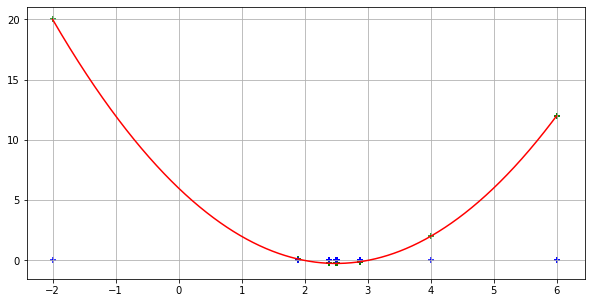

In [32]:
fig, ax1 = plt.subplots(nrows = 1, figsize = (10, 5))
tab = pd.DataFrame(columns=['iterations', 'x_k = argmin(Q_k)', 'min(Q_k)', 'x_t = argmin(R_t)', 'min(R_t)', 'L'])
minimum, tab = Piyavsky(-2, 6, func, 0.01, 2,  ax1, tab)
print(minimum)
xx = np.linspace(-2, 6, 1000)
ax1.plot(xx, func(xx), c = "red")
ax1.grid()
tab